# EDA 및 시각화 


----------------------------------
# 시작합시다..

![](https://insightimi.files.wordpress.com/2020/07/on-de793_201909_g_20190830121038.gif)



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import folium


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [3]:
#pip install folium

In [4]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
df = pd.read_csv('강남구전세데이터.csv')

In [6]:
macn = pd.read_csv('맥도날드.csv', encoding='cp949')

In [7]:
mch = pd.read_csv('미쉐린.csv', encoding='cp949')

In [8]:
st = pd.read_csv('스타벅스.csv', encoding='cp949')

In [178]:
ds = pd.read_csv('백화점.csv')
ds

,Latitude,Longitude,사업장명
0,37.528080,127.041569,갤러리아백화점(동관)
1,37.527327,127.027427,(주)현대백화점 본점
2,37.508615,127.059781,현대백화점 무역센터점
3,37.528561,127.040055,갤러리아백화점(서관)
4,37.497058,127.053594,롯데백화점(강남점)
5,37.523393,127.043658,SSG Food Market 백화점


In [10]:
rate = pd.read_csv('금리.csv')

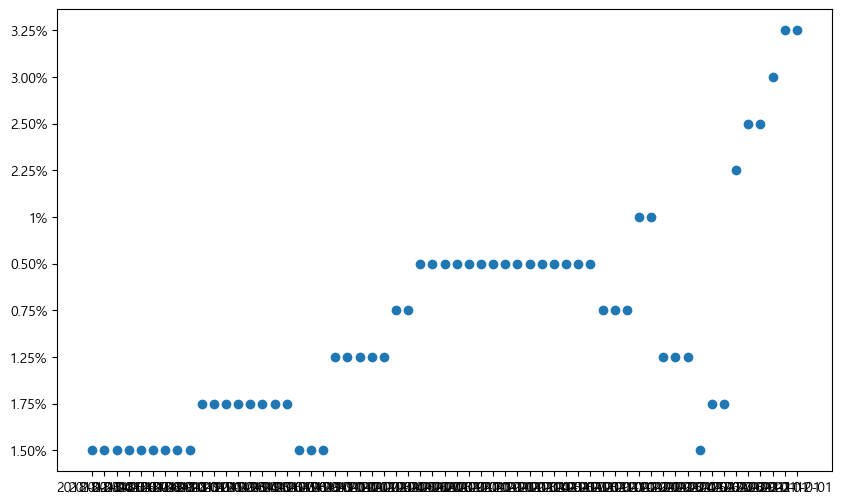

In [189]:
plt.figure(figsize=(10, 6)) #금리추세 확인
plt.scatter(x=rate['2018-01-01'],y=rate['1.50%'], marker='o')

In [12]:
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,127.054330,3,1,1,1,2.64,0,0,1,45000
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,127.047239,3,17,0,2,2.74,0,0,1,38000
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,127.039963,3,31,1,2,2.64,0,0,0,23500
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,127.045854,1,0,0,0,2.44,0,0,1,3000


In [13]:
df.describe()

,AD_Code,Area,YearBuilt,Floor,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
count,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,8.736100e+04
mean,5.422694,67.776567,2000.491901,6.859915,22.508099,37.498124,127.057102,2.651034,1.253111,0.343162,0.528291,3.189517,0.132267,0.834732,1.074610,5.921226e+04
std,4.148519,37.183271,12.485836,5.758265,12.485836,0.015544,0.022320,2.424018,3.290181,0.520519,0.878938,0.669428,0.347259,0.811884,0.833464,4.606194e+04
min,0.000000,11.390000,1972.000000,-1.000000,0.000000,37.460288,127.018254,0.000000,0.000000,0.000000,0.000000,2.390000,0.000000,0.000000,0.000000,4.500000e+02
25%,2.000000,40.560000,1992.000000,3.000000,10.000000,37.488198,127.040612,0.000000,0.000000,0.000000,0.000000,2.560000,0.000000,0.000000,0.000000,2.520000e+04
50%,4.000000,59.920000,2002.000000,5.000000,21.000000,37.496665,127.051556,2.000000,0.000000,0.000000,0.000000,3.080000,0.000000,1.000000,1.000000,4.650000e+04
75%,9.000000,84.930000,2013.000000,10.000000,31.000000,37.508595,127.068504,4.000000,1.000000,1.000000,1.000000,3.510000,0.000000,1.000000,2.000000,8.000000e+04
max,13.000000,301.470000,2023.000000,67.000000,51.000000,37.533026,127.112686,10.000000,32.000000,2.000000,5.000000,4.820000,2.000000,3.000000,3.000000,1.100000e+06


In [203]:
#df2 = df.groupby("Admin_District")['y'].mean() #동끼리 평균 전세가 비교
#df2.to_frame()

In [70]:
bins = [0,50000,100000,200000,1200000]  # 구간 설정
labels = ['0~5','5~10','10억~20억','20억~120억']  # 구간에 대한 레이블

df['range'] = pd.cut(df['y'], bins=bins, labels=labels)

In [152]:
grouped = df.groupby('range')
grouped_stats = grouped['y'].agg(['count', 'mean', 'min', 'max'])
grouped_stats

,count,mean,min,max
range,,,,
0~5,47385,27855.878717,450,50000
5~10,26764,72337.004372,50052,100000
10억~20억,12173,135976.690134,100320,200000
20억~120억,1039,251799.278152,201500,1100000


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

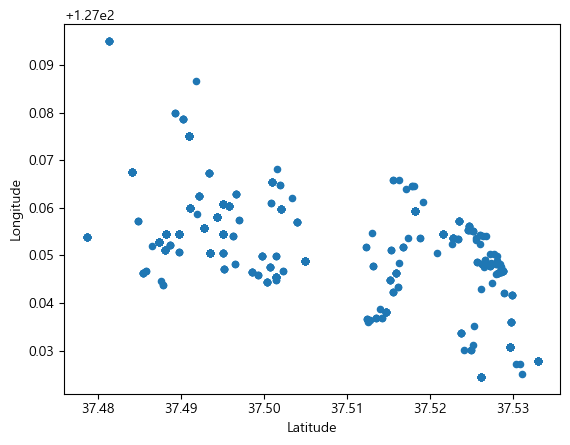

In [163]:
threshold = 200000  # 특정 값 20억 이상
filtered_df = df[df['y'] >= threshold]

# scatter 그래프 그리기
filtered_df.plot.scatter(x='Latitude', y='Longitude')

In [164]:
filtered_df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,...,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y,range,날짜구간
8085,11,일원동,44.0000,1986,단독다가구,3.0,서울특별시 강남구 양재대로51길,2020-12-28,37,37.491824,...,0,0,0,2.59,0,0,1,242000,20억~120억,문재인정권
9078,0,개포동,107.1324,2021,아파트,14.0,서울특별시 강남구 개포로 311,2021-11-02,2,37.484828,...,0,0,0,3.51,0,1,2,200000,10억~20억,문재인정권
9079,0,개포동,107.1324,2021,아파트,14.0,서울특별시 강남구 개포로 311,2021-11-02,2,37.484828,...,0,0,0,3.51,0,1,2,200000,10억~20억,문재인정권
9082,0,개포동,108.2017,2021,아파트,16.0,서울특별시 강남구 개포로 311,2021-12-13,2,37.484828,...,0,0,0,3.63,0,1,2,200000,10억~20억,문재인정권
9145,0,개포동,112.9700,2020,아파트,27.0,서울특별시 강남구,2021-02-09,3,37.496665,...,0,0,0,2.66,1,1,1,210000,20억~120억,문재인정권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85908,13,청담동,166.0100,2009,아파트,16.0,서울특별시 강남구 압구정로79길 76,2018-06-14,14,37.525603,...,3,0,0,3.46,0,0,1,300000,20억~120억,문재인정권
86089,7,신사동,242.1600,2002,아파트,6.0,서울특별시 강남구 언주로164길 20,2019-06-24,21,37.525322,...,15,1,2,2.74,0,0,0,280000,20억~120억,문재인정권
86105,13,청담동,244.3200,2006,아파트,16.0,서울특별시 강남구 압구정로79길 87,2019-07-09,17,37.526407,...,3,0,0,2.64,0,0,0,450000,20억~120억,문재인정권
86106,13,청담동,254.9600,2009,아파트,7.0,서울특별시 강남구 압구정로79길 72,2019-03-29,14,37.525587,...,3,0,0,3.04,0,0,1,400000,20억~120억,문재인정권


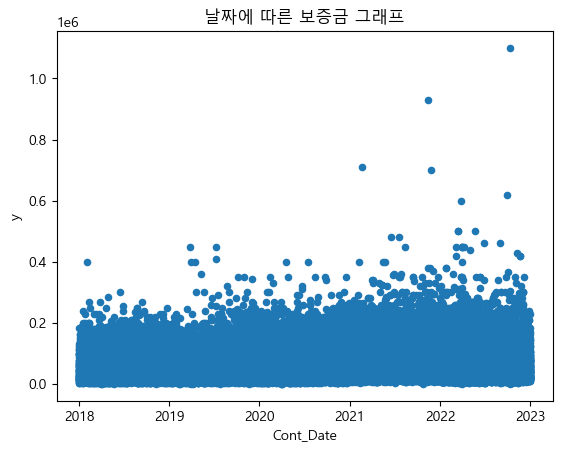

In [72]:
df.plot.scatter(x='Cont_Date', y='y', title='날짜에 따른 보증금 그래프')
plt.show()

In [74]:
grouped = df.groupby('range')
grouped_stats = grouped['y'].agg(['count', 'mean', 'min', 'max'])

In [75]:
grouped_stats #보증금별 위치 파악을 위한 구간설정

,count,mean,min,max
range,,,,
0~5,47385,27855.878717,450,50000
5~10,26764,72337.004372,50052,100000
10억~20억,12173,135976.690134,100320,200000
20억~120억,1039,251799.278152,201500,1100000


In [76]:
df['Cont_Date'] = pd.to_datetime(df['Cont_Date']) #정권시기 교체의 영향 파악을 위함 코드start

In [80]:
#df.to_csv('./보증금구간나눈거까지.csv')

In [202]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
#df[['y','Admin_District']].groupby(['Admin_District']).mean().plot.bar(ax=ax[0])

In [201]:
#df3 = df.groupby(["Admin_District","Star_Cnt"])['y'].mean() #스타벅스 개수와 전세평균가
#df3.to_frame()

In [200]:
#df4= df.groupby(['Admin_District','Type'])['Type'].count() 
#df4.to_frame()

In [199]:
#df5 = df.groupby(['Admin_District','Type'])['y'].mean()
#df5.to_frame()

In [198]:
#df6 = df.groupby(['Admin_District','Subway_cnt'])['y'].mean() # 역세권
#df6.to_frame()

In [86]:
#df.groupby('Subway_cnt')['y'].mean() #평균적으로는 역이 많으면 비싸긴 함.

Subway_cnt
0    52916.010151
1    55770.490083
2    84752.345734
3    71668.926395
Name: y, dtype: float64

In [153]:
#macn

In [154]:
#st

In [155]:
#mch

# 통계로 요약해보기
- 연습 또 연습입니다.

In [90]:
df.describe()

,AD_Code,Area,YearBuilt,Floor,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
count,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,8.736100e+04
mean,5.422694,67.776567,2000.491901,6.859915,22.508099,37.498124,127.057102,2.651034,1.253111,0.343162,0.528291,3.189517,0.132267,0.834732,1.074610,5.921226e+04
std,4.148519,37.183271,12.485836,5.758265,12.485836,0.015544,0.022320,2.424018,3.290181,0.520519,0.878938,0.669428,0.347259,0.811884,0.833464,4.606194e+04
min,0.000000,11.390000,1972.000000,-1.000000,0.000000,37.460288,127.018254,0.000000,0.000000,0.000000,0.000000,2.390000,0.000000,0.000000,0.000000,4.500000e+02
25%,2.000000,40.560000,1992.000000,3.000000,10.000000,37.488198,127.040612,0.000000,0.000000,0.000000,0.000000,2.560000,0.000000,0.000000,0.000000,2.520000e+04
50%,4.000000,59.920000,2002.000000,5.000000,21.000000,37.496665,127.051556,2.000000,0.000000,0.000000,0.000000,3.080000,0.000000,1.000000,1.000000,4.650000e+04
75%,9.000000,84.930000,2013.000000,10.000000,31.000000,37.508595,127.068504,4.000000,1.000000,1.000000,1.000000,3.510000,0.000000,1.000000,2.000000,8.000000e+04
max,13.000000,301.470000,2023.000000,67.000000,51.000000,37.533026,127.112686,10.000000,32.000000,2.000000,5.000000,4.820000,2.000000,3.000000,3.000000,1.100000e+06


In [91]:
#df.describe(include = 'object')

,Admin_District,Type,Address,날짜구간
count,87361,87361,87361,87361
unique,14,4,3729,4
top,역삼동,아파트,서울특별시 강남구 삼성로 212,문재인정권
freq,14741,53963,2969,70200


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

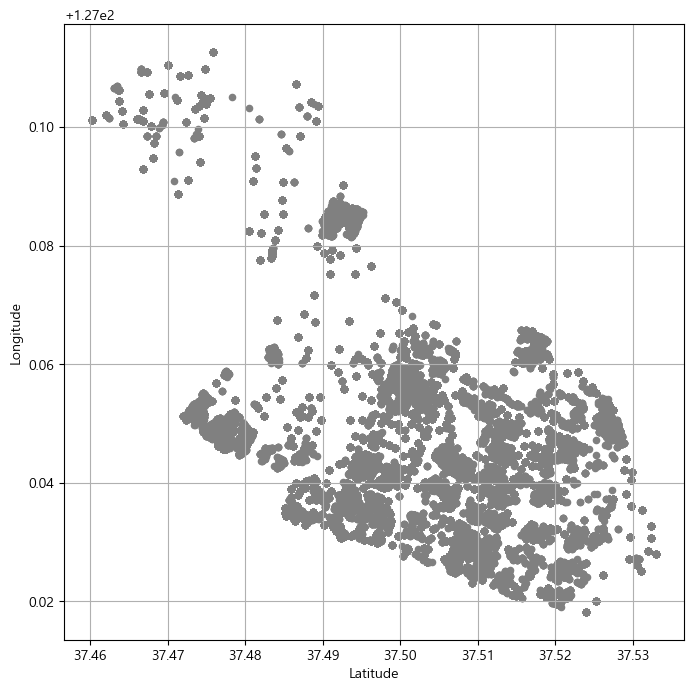

In [93]:
df.plot.scatter(x="Latitude", y="Longitude", figsize=(8, 8), grid = True, color='grey')

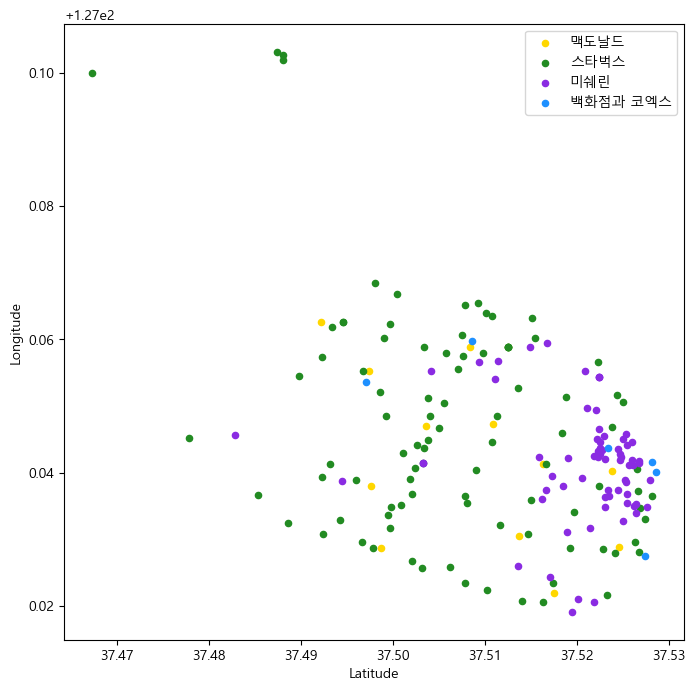

In [127]:
ax = macn.plot.scatter(x="맥도날드 위도", y="맥도날드 경도", color='gold',figsize=(8, 8), label="맥도날드") 
st.plot.scatter(x='스타벅스 위도', y='스타벅스 경도', color='forestgreen', ax=ax, label="스타벅스")
mch.plot.scatter(x="미쉐린 위도", y="미쉐린 경도", color='blueviolet', ax=ax, label="미쉐린")
ds.plot.scatter(x="Latitude", y="Longitude", color='dodgerblue',ax=ax, label="백화점과 코엑스" )
ax.legend()
plt.show()

In [197]:
#st.plot.scatter(x="스타벅스 위도", y="스타벅스 경도", color='lightcoral', figsize=(8, 8))

In [196]:
#mch.plot.scatter(x="미쉐린 위도", y="미쉐린 경도", color='blueviolet', figsize=(8, 8))

In [195]:
#ds.plot.scatter(x="Latitude", y="Longitude", color='dodgerblue', figsize=(8, 8))
#plt.ylabel("경도")
#plt.xlabel("위도")
#plt.title("백화점")

In [98]:
#map = folium.Map(location=[df["Latitude"].mean(),df["Longitude"].mean()], zoom_start=1)
#map

In [99]:
'''for n in df.index:
    address = df.loc[n, "Address"]
    location = [df.loc[n, "Latitude"], df.loc[n, "Longitude"]]
    folium.Marker(
        location = location,
    ).add_to(map)
map'''

'for n in df.index:\n    address = df.loc[n, "Address"]\n    location = [df.loc[n, "Latitude"], df.loc[n, "Longitude"]]\n    folium.Marker(\n        location = location,\n    ).add_to(map)\nmap'

In [204]:
'''
plt.figure(figsize = (8,8))
sns.scatterplot(data = df, x="Latitude", y="Longitude", s=20**1.5, hue='Star_Cnt') #스타벅스
plt.show()'''

'\nplt.figure(figsize = (8,8))\nsns.scatterplot(data = df, x="Latitude", y="Longitude", s=20**1.5, hue=\'Star_Cnt\') #스타벅스\nplt.show()'

In [205]:
'''
x1=df["Latitude"]
plt.figure(figsize = (15,13))
sns.scatterplot(data = df, x=x1, y="Longitude", hue='y') #보증금 s=20**1.5, hue='Star_Cnt'
plt.show()
'''

'\nx1=df["Latitude"]\nplt.figure(figsize = (15,13))\nsns.scatterplot(data = df, x=x1, y="Longitude", hue=\'y\') #보증금 s=20**1.5, hue=\'Star_Cnt\'\nplt.show()\n'

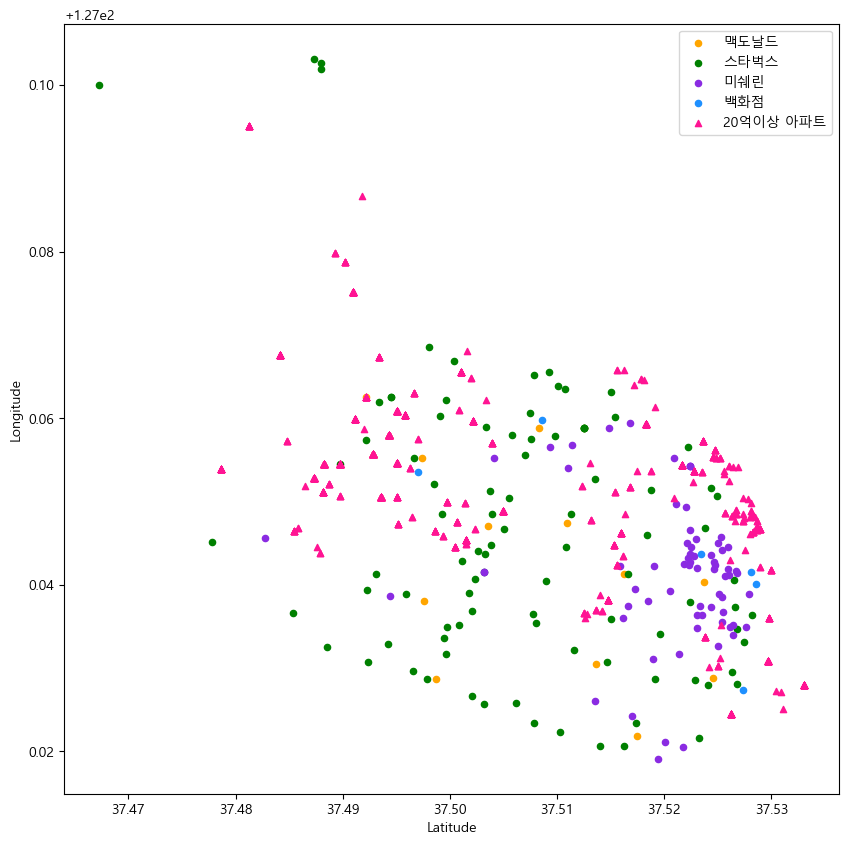

In [193]:
ax = macn.plot.scatter(x="맥도날드 위도", y="맥도날드 경도", color='orange',figsize=(10,10), label="맥도날드") 
st.plot.scatter(x='스타벅스 위도', y='스타벅스 경도', color='green', ax=ax, label="스타벅스")
mch.plot.scatter(x="미쉐린 위도", y="미쉐린 경도", color='blueviolet', ax=ax, label="미쉐린")
ds.plot.scatter(x="Latitude", y="Longitude", color='dodgerblue',ax=ax, label="백화점" )
ax.legend()

threshold = 200000  # 특정 값, 20억이상 아파트
filtered_df = df[df['y'] >= threshold]

# scatter 그래프 그리기
filtered_df.plot.scatter(x='Latitude', y='Longitude',color='deeppink',ax=ax,marker='^',label="20억이상 아파트")
plt.show()

#x1=df["Latitude"]
#plt.figure(figsize = (15,13))
#sns.scatterplot(data = df, x=x1, y="Longitude", hue='range', s = (x1 + 2) * 2, marker='^',ax=ax) #보증금
